In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("train.csv",usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [9]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [10]:
x= df.drop(['Survived'],axis=1)
y=df['Survived']

In [11]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
x_train_scaler = sc.fit_transform(x_train)

In [14]:
x_train_scaler

array([[-1.61413602,  1.25364106, -0.07868358],
       [-0.40055118, -0.47728355, -0.37714494],
       [ 0.81303367,  0.21508629, -0.47486697],
       ...,
       [ 0.81303367,  0.90745614, -0.35580399],
       [-1.61413602, -1.1696534 ,  1.68320121],
       [-1.61413602, -0.63114352,  0.86074761]])

In [15]:
x_test_scaler = sc.transform(x_test)
x_test_scaler

array([[ 8.13033667e-01, -9.26336398e-02, -3.33900778e-01],
       [-4.00551178e-01,  1.38156309e-01, -4.25283869e-01],
       [ 8.13033667e-01, -7.08073503e-01, -4.74866965e-01],
       [-4.00551178e-01, -1.78509326e+00,  7.96648968e-03],
       [ 8.13033667e-01, -1.16965340e+00, -4.11002011e-01],
       [-1.61413602e+00, -2.46493606e-01,  8.90834443e-01],
       [ 8.13033667e-01, -9.26336398e-02, -4.78236690e-01],
       [ 8.13033667e-01, -1.01579343e+00, -2.80867083e-01],
       [ 8.13033667e-01, -1.01579343e+00, -4.78236690e-01],
       [-1.61413602e+00, -7.85003486e-01, -1.21367407e-01],
       [-1.61413602e+00,  5.99736206e-01,  3.95003477e-01],
       [ 8.13033667e-01,  1.13824609e+00, -4.72460019e-01],
       [ 8.13033667e-01, -9.26336398e-02, -1.37091507e-01],
       [ 8.13033667e-01,  6.12263260e-02, -4.88345865e-01],
       [-4.00551178e-01,  5.22806223e-01, -3.77144940e-01],
       [-1.61413602e+00, -1.01579343e+00,  1.31202147e-01],
       [-1.61413602e+00,  9.84386120e-01

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train_scaler , y_train)
pred = lr.predict(x_test_scaler)
print(accuracy_score(pred , y_test))

0.7374301675977654


# Min Max Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mms = MinMaxScaler()
df_mms_train = pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
df_mms_train.head()

,Pclass,Age,Fare
0,0.0,0.566474,0.055628
1,0.5,0.283740,0.025374
2,1.0,0.396833,0.015469
3,1.0,0.321438,0.015330
4,1.0,0.070118,0.061045


In [31]:
df_mms_test = pd.DataFrame(mms.transform(x_test),columns=x_test.columns)
df_mms_test

,Pclass,Age,Fare
0,1.0,0.346569,0.029758
1,0.5,0.384267,0.020495
2,1.0,0.246042,0.015469
3,0.5,0.070118,0.064412
4,1.0,0.170646,0.021942
...,...,...,...
174,1.0,0.208344,0.013907
175,1.0,0.346569,0.014102
176,1.0,0.472229,0.061264
177,0.5,0.208344,0.020495


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(df_mms_train , y_train)
pred = lr.predict(df_mms_test)
print(accuracy_score(pred , y_test))

0.7374301675977654


# Robust Scaler

In [29]:
from sklearn.preprocessing import RobustScaler

In [33]:
mms = RobustScaler()
df_mms_train = pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
df_mms_train.head()

,Pclass,Age,Fare
0,-2.0,1.346154,0.622184
1,-1.0,-0.384615,-0.064416
2,0.0,0.307692,-0.289223
3,0.0,-0.153846,-0.292359
4,0.0,-1.692308,0.745107


In [34]:
df_mms_test = pd.DataFrame(mms.transform(x_test),columns=x_test.columns)
df_mms_test

,Pclass,Age,Fare
0,0.0,0.000000,0.035065
1,-1.0,0.230769,-0.175158
2,0.0,-0.615385,-0.289223
3,-1.0,-1.692308,0.821519
4,0.0,-1.076923,-0.142303
...,...,...,...
174,0.0,-0.846154,-0.324660
175,0.0,0.000000,-0.320230
176,0.0,0.769231,0.750091
177,-1.0,-0.846154,-0.175158


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(df_mms_train , y_train)
pred = lr.predict(df_mms_test)
print(accuracy_score(pred , y_test))

0.7318435754189944


# Guassian Distribution

In [36]:
import scipy.stats as stat
import pylab

In [37]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

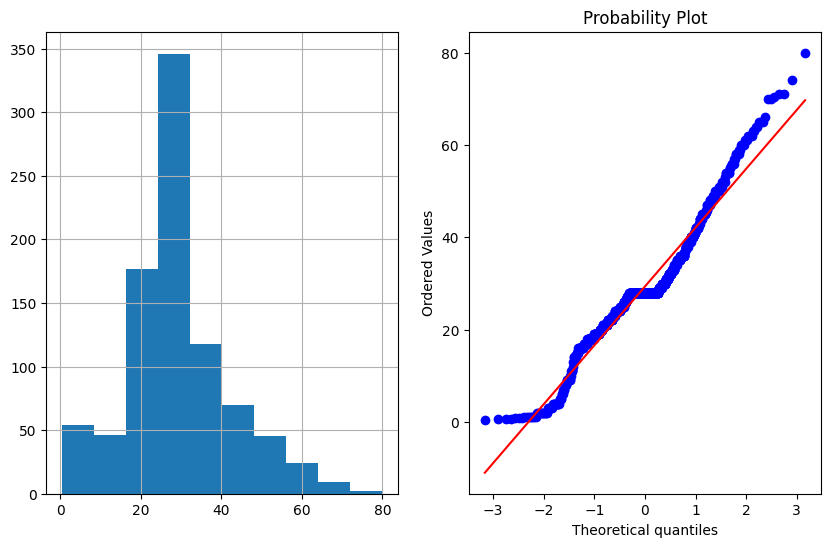

In [38]:
plot_data(df,'Age')

**above plot is right skewwed**

**try with logarithmic transformation**

import numpy as np
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

**above plot is left skewwed**

**try with reciprocal transformation**

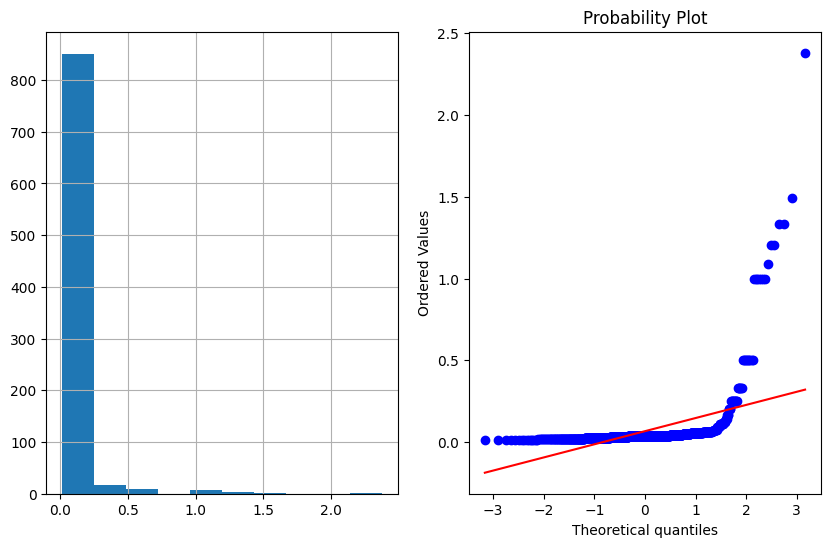

In [40]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

**totally right skewed**

**try with square root transformation**

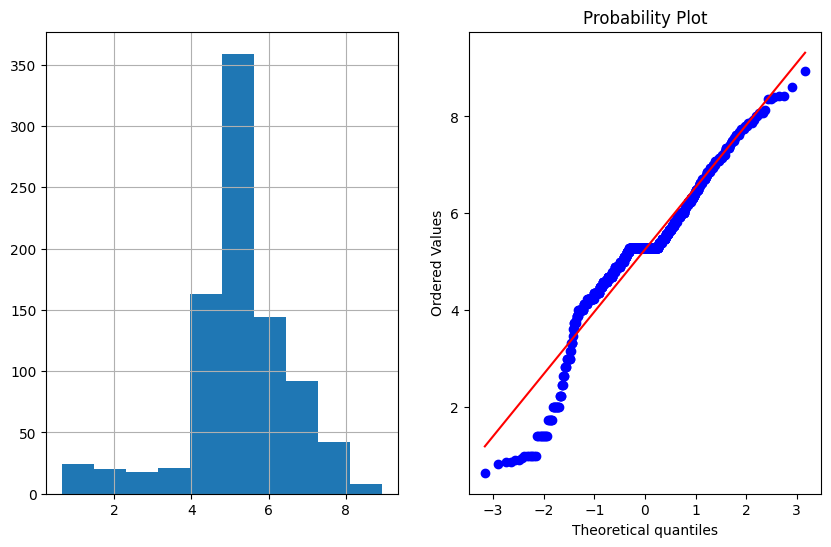

In [41]:
df['Age_square'] = df.Age** (1/2)
plot_data(df,'Age_square')

**it is ok but somewaht left skewed**

**try with exponential transformation**

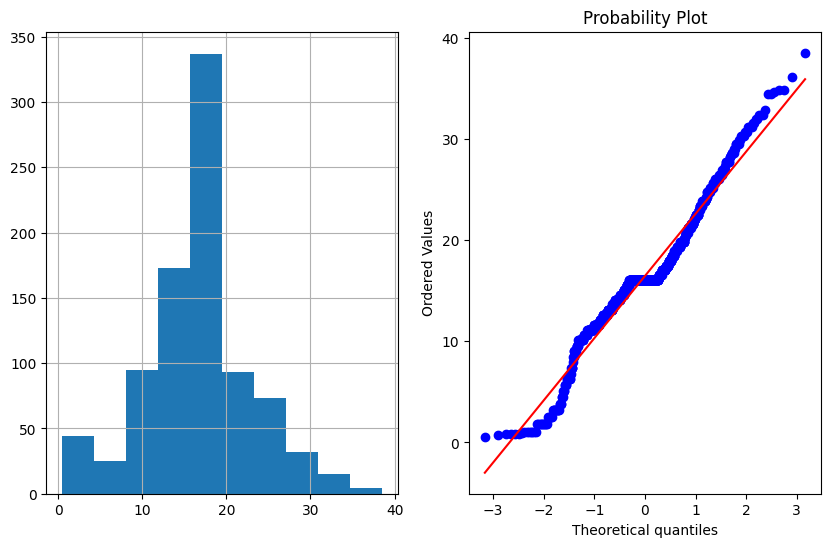

In [42]:
df['Age_square'] = df.Age** (1/1.2)
plot_data(df,'Age_square')

**this is good**

**try with boxcox transformation**

In [43]:
df['Age_boxcox'] , parameters = stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


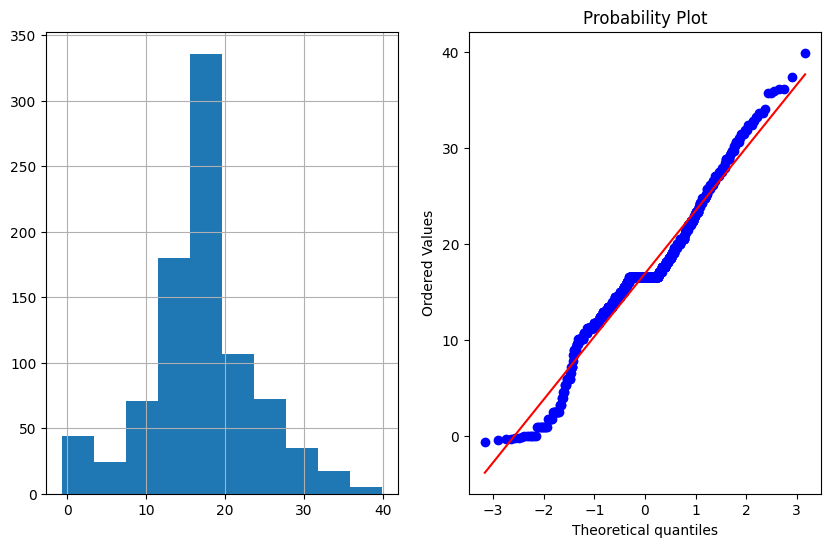

In [44]:
plot_data(df,'Age_boxcox')

**this is perfect**